In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Friedmann equation

* ref: https://iopscience.iop.org/article/10.1088/1475-7516/2024/11/025

Friedmann euqation:

$$
H(a)^2 = H_0^2 \sum_i \Omega_i f_i(a)
$$

where $f_i(a)$ are the solutions for the continuity equiation for each given species contributing to the total energy budget,

$$
\frac{d\rho_i(a)}{da} = - \frac{3}{a}(1 + w_i(a))\rho_i(a),
$$

$$
f_i(a) = \frac{\rho_i(a)}{\Omega_i \rho_{c,0}}
$$

where $\rho_{c,0}$ is the critical energy density today.

# CPL parameterization

$$
w_{CPL}(a) = w_0 + w_a (1 - a)
$$

$$
f_{CPL} = a^{-3(1 + w_0 + w_a)} e^{-3 w_a (1 - a)}
$$

In [2]:
def compute_w(a, w0, wa):
    return w0 + wa * (1 - a)

<IPython.core.display.Javascript object>


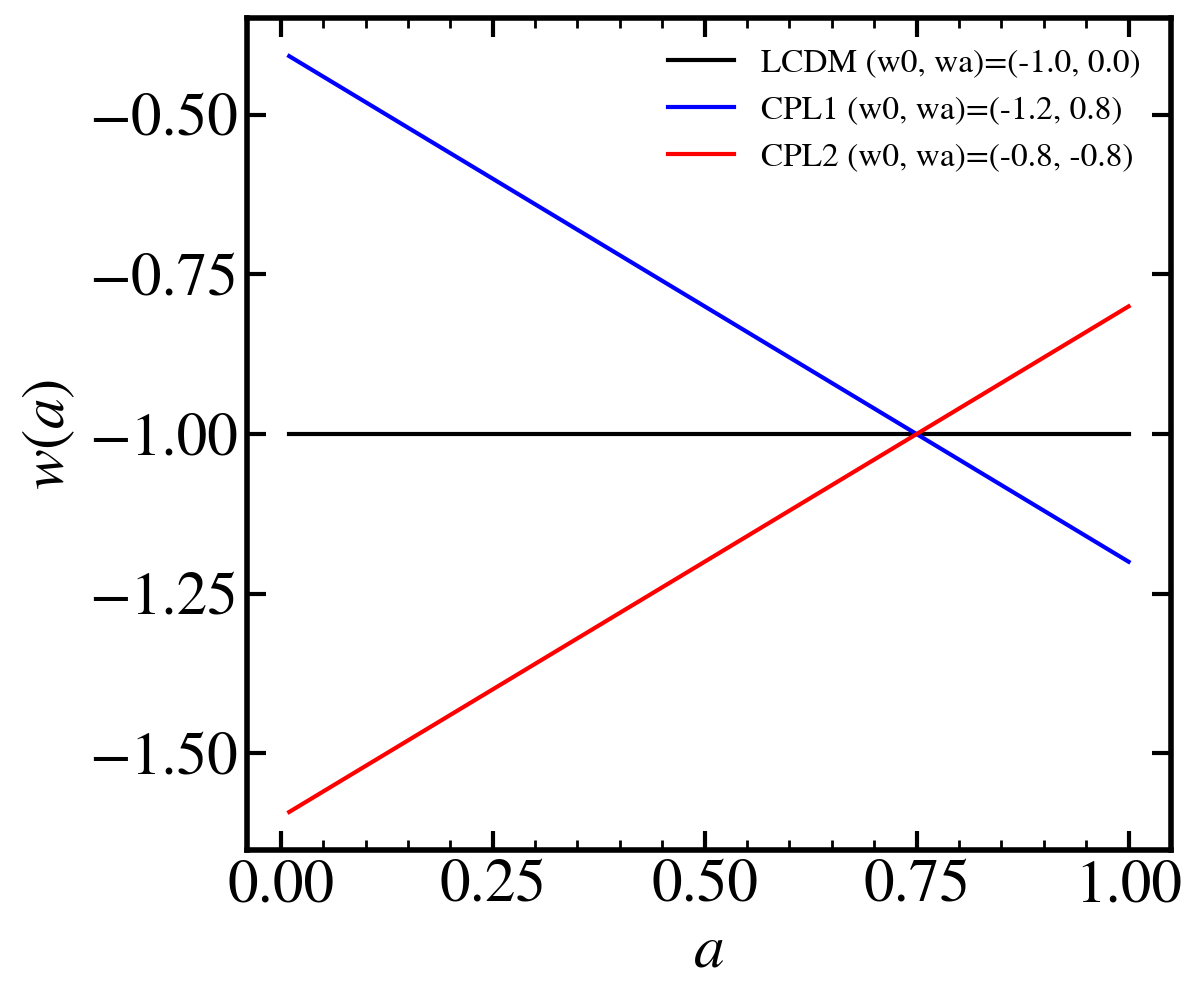

In [3]:
amin, amax = 0.01, 1
a = np.linspace(amin, amax, 100)

plt.figure(figsize=(6, 5))

plt.plot(a, compute_w(a, -1.0,  0.0), c='k', label="LCDM (w0, wa)=(-1.0, 0.0)")
plt.plot(a, compute_w(a, -1.2,  0.8), c='b', label="CPL1 (w0, wa)=(-1.2, 0.8)")
plt.plot(a, compute_w(a, -0.8, -0.8), c='r', label="CPL2 (w0, wa)=(-0.8, -0.8)")

plt.legend(fontsize=12, frameon=False)
plt.xlabel("$a$")
plt.ylabel(r"$w(a)$")
plt.tight_layout(pad=0.3)

In [4]:
def compute_fa(a, w0, wa):
    fa = a**(-3 * (1 + w0 + wa)) * np.exp(-3 * wa * (1 - a))
    return fa

In [5]:
Omega_m = 0.26
Omega_b = 0.044
Omega_k = 0.0
Omega_l = 1 - Omega_m

amin, amax = 0.01, 1
a = np.linspace(amin, amax, 100)

term_m  = Omega_m * a**-3
term_l1 = Omega_l * compute_fa(a, -1.0,  0.0)
term_l2 = Omega_l * compute_fa(a, -1.2,  0.8)
term_l3 = Omega_l * compute_fa(a, -0.8, -0.8)

<IPython.core.display.Javascript object>


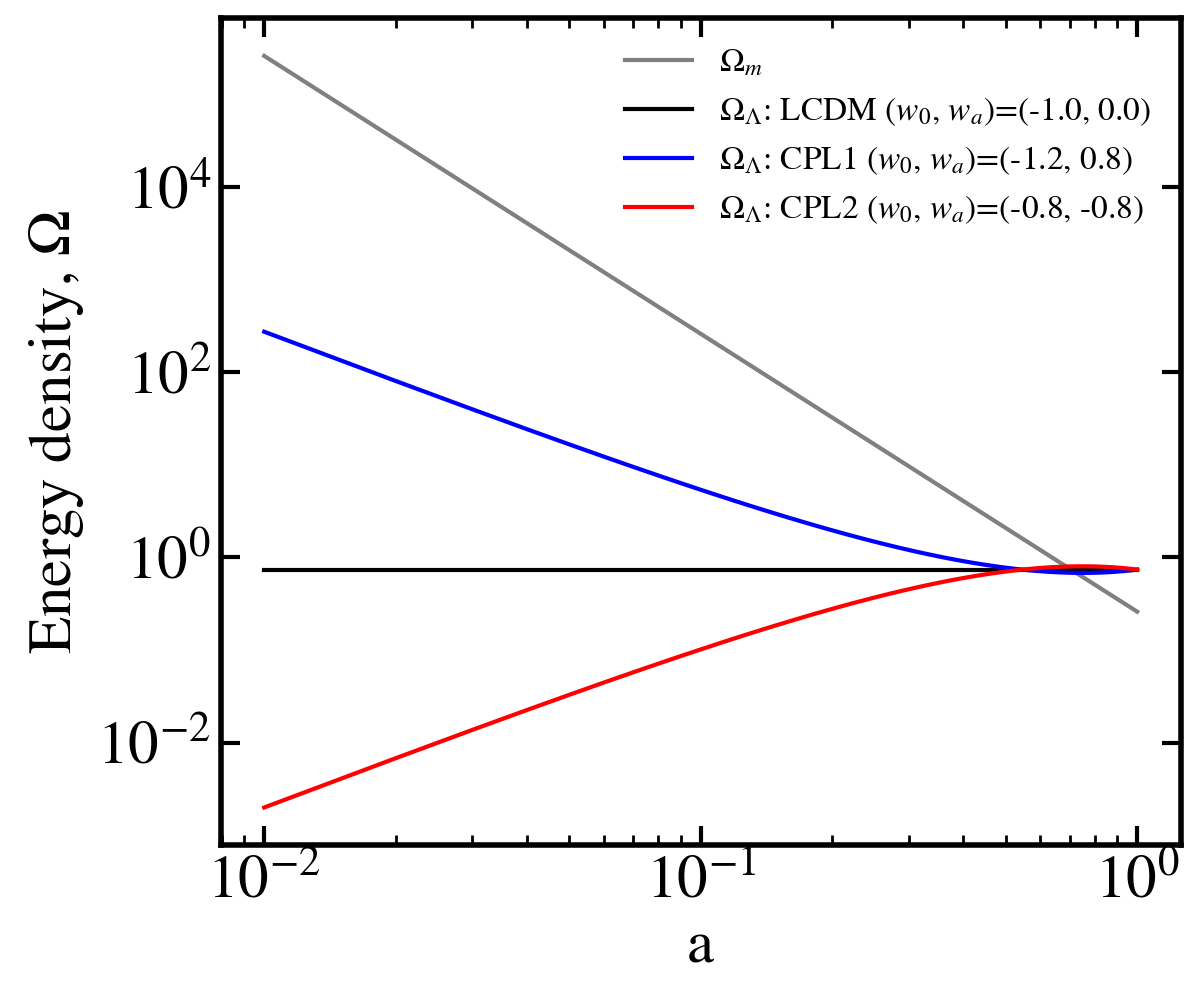

In [6]:
plt.figure(figsize=(6, 5))
plt.loglog(a, term_m, c='gray', label=r"$\Omega_m$")
plt.loglog(a, term_l1, c='k', label=r"$\Omega_{\Lambda}$: LCDM ($w_0$, $w_a$)=(-1.0, 0.0)")
plt.loglog(a, term_l2, c='b', label=r"$\Omega_{\Lambda}$: CPL1 ($w_0$, $w_a$)=(-1.2, 0.8)")
plt.loglog(a, term_l3, c='r', label=r"$\Omega_{\Lambda}$: CPL2 ($w_0$, $w_a$)=(-0.8, -0.8)")

plt.legend(fontsize=12, frameon=False)
plt.xlabel("a")
plt.ylabel(r"Energy density, $\Omega$")
plt.tight_layout(pad=0.3)

```f90
function dadtau(axp_tau,O_mat_0,O_vac_0,O_k_0,w0,wa)
  use amr_parameters
  real(kind=8)::dadtau,axp_tau,O_mat_0,O_vac_0,O_k_0
  real(kind=8)::w0,wa ! CPL model
  dadtau = axp_tau*axp_tau*axp_tau *  &
       &   ( O_mat_0 + &
       &     O_vac_0 * axp_tau**(-3.0d0 * (w0 + wa)) * exp(-3.0d0 * wa * (1.0d0 - axp_tau)) + &
       &     O_k_0   * axp_tau )
  dadtau = sqrt(dadtau)
  return
end function dadtau

function dadt(axp_t,O_mat_0,O_vac_0,O_k_0,w0,wa)
  use amr_parameters
  real(kind=8)::dadt,axp_t,O_mat_0,O_vac_0,O_k_0
  real(kind=8)::w0,wa ! CPL model
  dadt   = (1.0D0/axp_t)* &
       &   ( O_mat_0 + &
       &     O_vac_0 * axp_t**(-3.0d0 * (w0 + wa)) * exp(-3.0d0 * wa * (1.0d0 - axp_t)) + &
       &     O_k_0   * axp_t )
  dadt = sqrt(dadt)
  return
end function dadt
```

In [7]:
def compute_dadt(axp_t, O_mat_0, O_vac_0, O_k_0, w0, wa):
    dadt2 = (1/axp_t) * \
            (O_mat_0 + \
             O_vac_0 * axp_t**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - axp_t)) + \
             O_k_0 * axp_t)
    dadt = np.sqrt(dadt2)
    return dadt

def compute_dadtau(axp_tau, O_mat_0, O_vac_0, O_k_0, w0, wa):
    dadtau2 = axp_tau**3 * \
              (O_mat_0 + \
               O_vac_0 * axp_tau**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - axp_tau)) + \
               O_k_0 * axp_tau)
    dadtau = np.sqrt(dadtau2)
    return dadtau

In [12]:
Omega_m = 0.26
Omega_b = 0.044
Omega_k = 0.0
Omega_l = 1 - Omega_m

h = 0.72
H0 = h*100

amin, amax = 0.05, 1
a = np.linspace(amin, amax, 100)

dadt1 = compute_dadt(a, Omega_m, Omega_l, Omega_k, -1.0,  0.0)
dadt2 = compute_dadt(a, Omega_m, Omega_l, Omega_k, -1.2,  0.8)
dadt3 = compute_dadt(a, Omega_m, Omega_l, Omega_k, -0.8, -0.8)

<IPython.core.display.Javascript object>


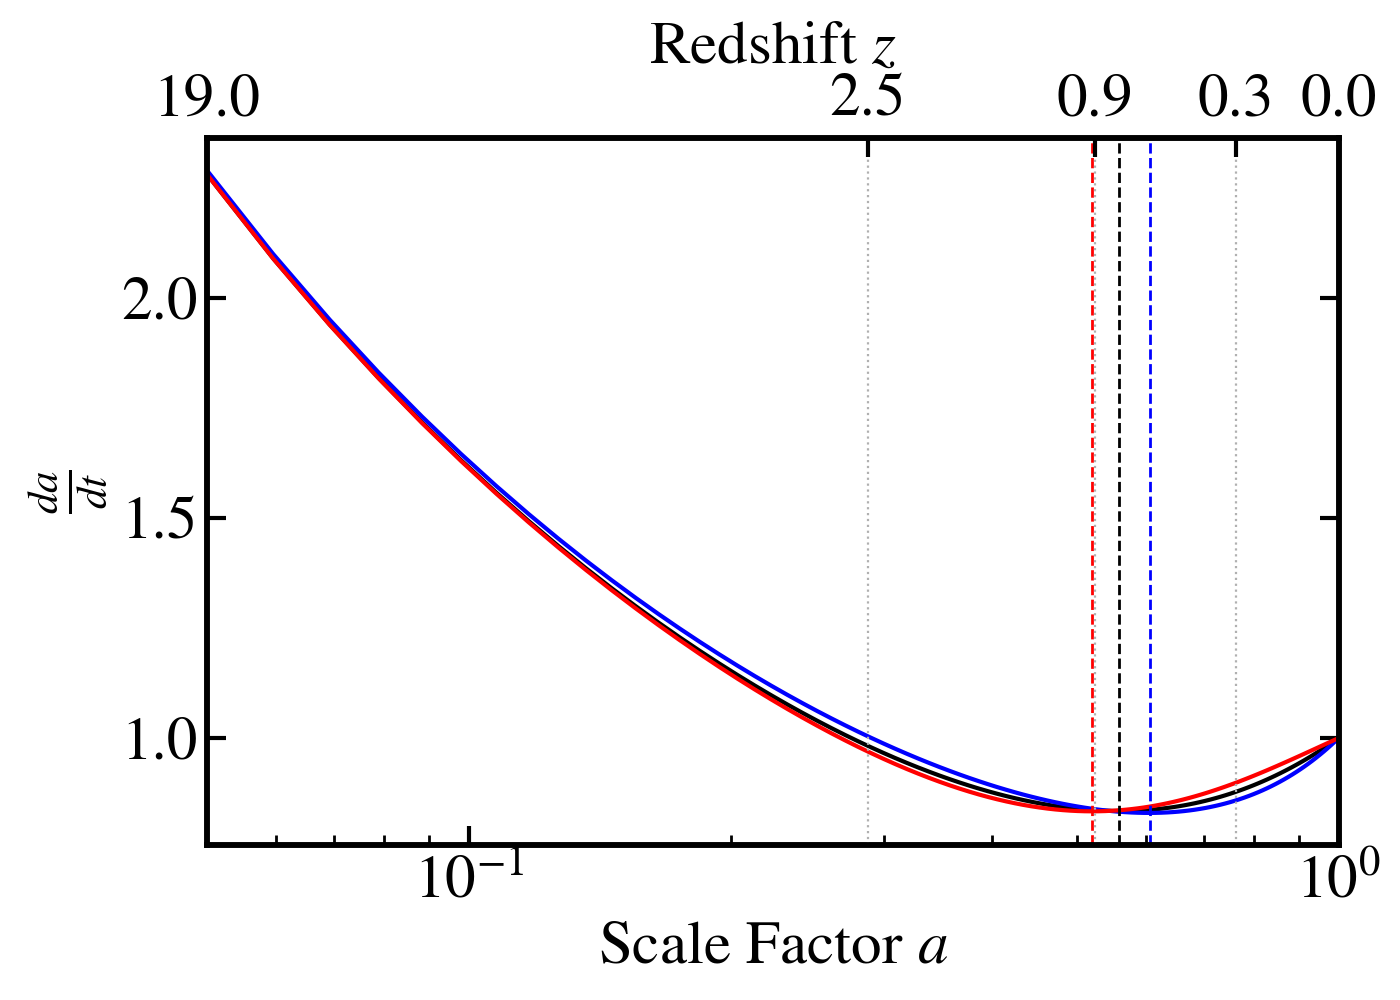

In [17]:
fig, ax1 = plt.subplots(figsize=(7, 5))

ax2 = ax1.twiny()
ax1.set_xlim(amin, amax)
ax2.set_xlim(amin, amax)
ax1.set_xscale('log')
ax2.set_xscale('log')
#ax1.set_yscale('log')

ax1.plot(a, dadt1, '-', c="k", ms=2, label="LCDM (w0, wa)=(-1.0, 0.0)")
ax1.plot(a, dadt2, '-', c="b", ms=2, label="CPL1 (w0, wa)=(-1.2, 0.8)")
ax1.plot(a, dadt3, '-', c="r", ms=2, label="CPL2 (w0, wa)=(-0.8, -0.8)")
ax1.axvline(a[np.where(dadt1==dadt1.min())], c="k", ls="--", lw=1)
ax1.axvline(a[np.where(dadt2==dadt2.min())], c="b", ls="--", lw=1)
ax1.axvline(a[np.where(dadt3==dadt3.min())], c="r", ls="--", lw=1)
ax1.set_xlabel(r"Scale Factor $a$")
ax1.set_ylabel(r"$\frac{da}{dt}$")
# ax1.set_xlim(10**(-1.5), 1)

xticks_a = np.linspace(amin, amax, 5)
# xticks_a = np.logspace(np.log10(amin), np.log10(amax), 5)
xticks_z = [1 / a_tick - 1 for a_tick in xticks_a]

ax2.set_xticks(xticks_a)
ax2.set_xticklabels([f"{z_tick:.1f}" for z_tick in xticks_z])
ax2.tick_params(which="minor", top=False)
ax2.set_xlabel("Redshift $z$")

plt.grid(ls=":")
plt.tight_layout(pad=0.3)
plt.show()

<IPython.core.display.Javascript object>


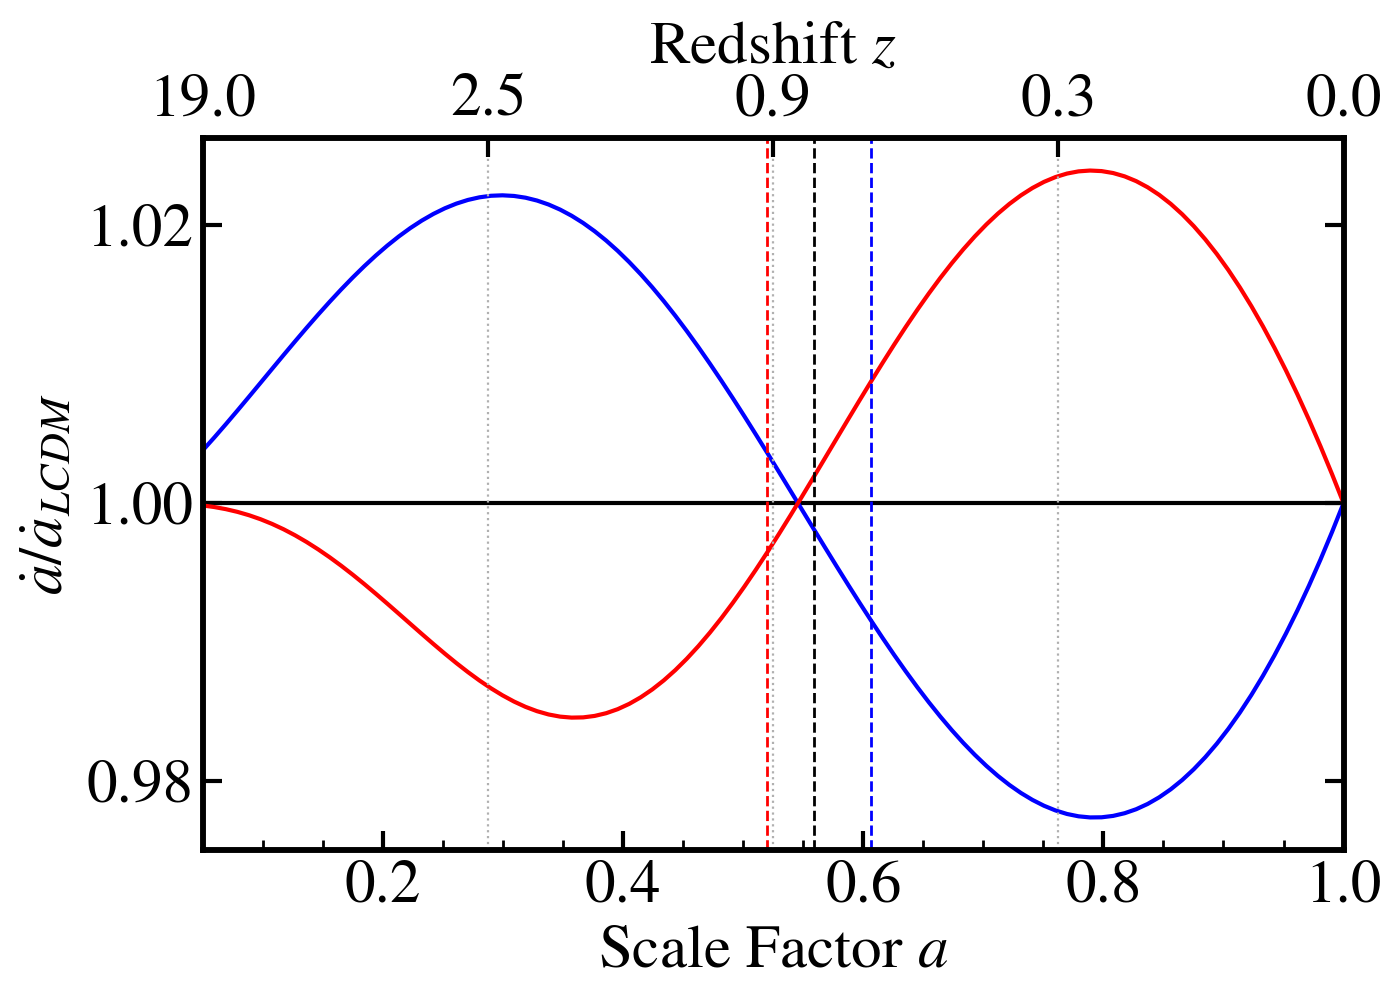

In [18]:
fig, ax1 = plt.subplots(figsize=(7, 5))

ax2 = ax1.twiny()
ax1.set_xlim(amin, amax)
ax2.set_xlim(amin, amax)

ax1.plot(a, dadt1/dadt1, '-', c="k", ms=2, label="LCDM")
ax1.plot(a, dadt2/dadt1, '-', c="b", ms=2, label="CPL1")
ax1.plot(a, dadt3/dadt1, '-', c="r", ms=2, label="CPL2")
ax1.axvline(a[np.where(dadt1==dadt1.min())], c="k", ls="--", lw=1)
ax1.axvline(a[np.where(dadt2==dadt2.min())], c="b", ls="--", lw=1)
ax1.axvline(a[np.where(dadt3==dadt3.min())], c="r", ls="--", lw=1)

ax1.set_xlabel(r"Scale Factor $a$")
ax1.set_ylabel(r"$\dot{a} / \dot{a}_{LCDM}$")

# ax1.set_xscale("log")
# ax1.set_yscale("log")
xticks_a = np.linspace(amin, amax, 5)
# xticks_a = np.logspace(np.log10(amin), np.log10(amax), 5)
# ax1.set_xticks([amin, amax])
ax1.tick_params(which="minor", labelbottom=False)

xticks_z = [1 / a_tick - 1 for a_tick in xticks_a]
ax2.set_xticks(xticks_a)
ax2.set_xticklabels([f"{z_tick:.1f}" for z_tick in xticks_z])
ax2.tick_params(which="minor", top=False)
ax2.set_xlabel("Redshift $z$")

plt.grid(ls=":")
plt.tight_layout(pad=0.3)
plt.show()

# Age of the Universe

In [19]:
from scipy.integrate import quad

def compute_fa(a, w0, wa):
    fa = a**(-3 * (1 + w0 + wa)) * np.exp(-3 * wa * (1 - a))
    return fa

def compute_Hubble(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa):
    term_m = Omega_m * a**-3
    term_r = Omega_r * a**-4
    term_k = Omega_k * a**-2
    term_l = Omega_l * compute_fa(a, w0, wa)
    Hubble = np.sqrt(term_m + term_r + term_k + term_l)
    return Hubble

def integrand_age(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa):
    H = compute_Hubble(a, Omega_m, Omega_r, Omega_k, Omega_l, w0, wa)
    return 1 / a / H

In [20]:
h  = 0.72
H0 = 100*h # km/s/Mpc

Omega_m = 0.26
Omega_b = 0.044
Omega_r = 0.0
Omega_k = 0.0
Omega_l = 1 - Omega_m

In [21]:
age1, age_err1 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -1, 0))
age2, age_err2 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -1.2, 0.8))
age3, age_err3 = quad(integrand_age, 1e-10, 1, args=(Omega_m, Omega_r, Omega_k, Omega_l, -0.8, -0.8))

In [22]:
Mpc_to_km = 206265 * 1.496 * 1e14

In [23]:
invH0_to_Gyr = Mpc_to_km / 3600 / 24 / 365 / 1e9

In [24]:
unit_t = 1/H0 * invH0_to_Gyr
unit_t

13.58995539489261

In [25]:
print("[Age of the Universe]")
print(f"LCDM (w0, wa)=(-1.0,  0.0): {age1:.3f} [1/H0], {age1*unit_t:.3f} Gyr")
print(f"CPL1 (w0, wa)=(-1.2,  0.8): {age2:.3f} [1/H0], {age2*unit_t:.3f} Gyr")
print(f"CPL2 (w0, wa)=(-0.8, -0.8): {age3:.3f} [1/H0], {age3*unit_t:.3f} Gyr")

[Age of the Universe]
LCDM (w0, wa)=(-1.0,  0.0): 1.003 [1/H0], 13.631 Gyr
CPL1 (w0, wa)=(-1.2,  0.8): 1.004 [1/H0], 13.639 Gyr
CPL2 (w0, wa)=(-0.8, -0.8): 1.000 [1/H0], 13.587 Gyr


# dadt $\rightarrow$ a

In [26]:
def dadt(y, t, O_mat_0, O_vac_0, O_k_0, w0, wa):
    a = y
    dadt2 = (1/a) * \
            (O_mat_0 + \
             O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \
             O_k_0 * a)
    dadt = np.sqrt(dadt2)
    return dadt

def dadtau(y, t, O_mat_0, O_vac_0, O_k_0, w0, wa):
    a = y
    dadtau2 = a**3 * \
              (O_mat_0 + \
               O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \
               O_k_0 * a)
    dadtau = np.sqrt(dadtau2)
    return dadtau

/tmp/ipykernel_2903361/1385294264.py:7: RuntimeWarning: invalid value encountered in sqrt
  dadt = np.sqrt(dadt2)
/tmp/ipykernel_2903361/1385294264.py:5: RuntimeWarning: invalid value encountered in power
  O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \


<IPython.core.display.Javascript object>


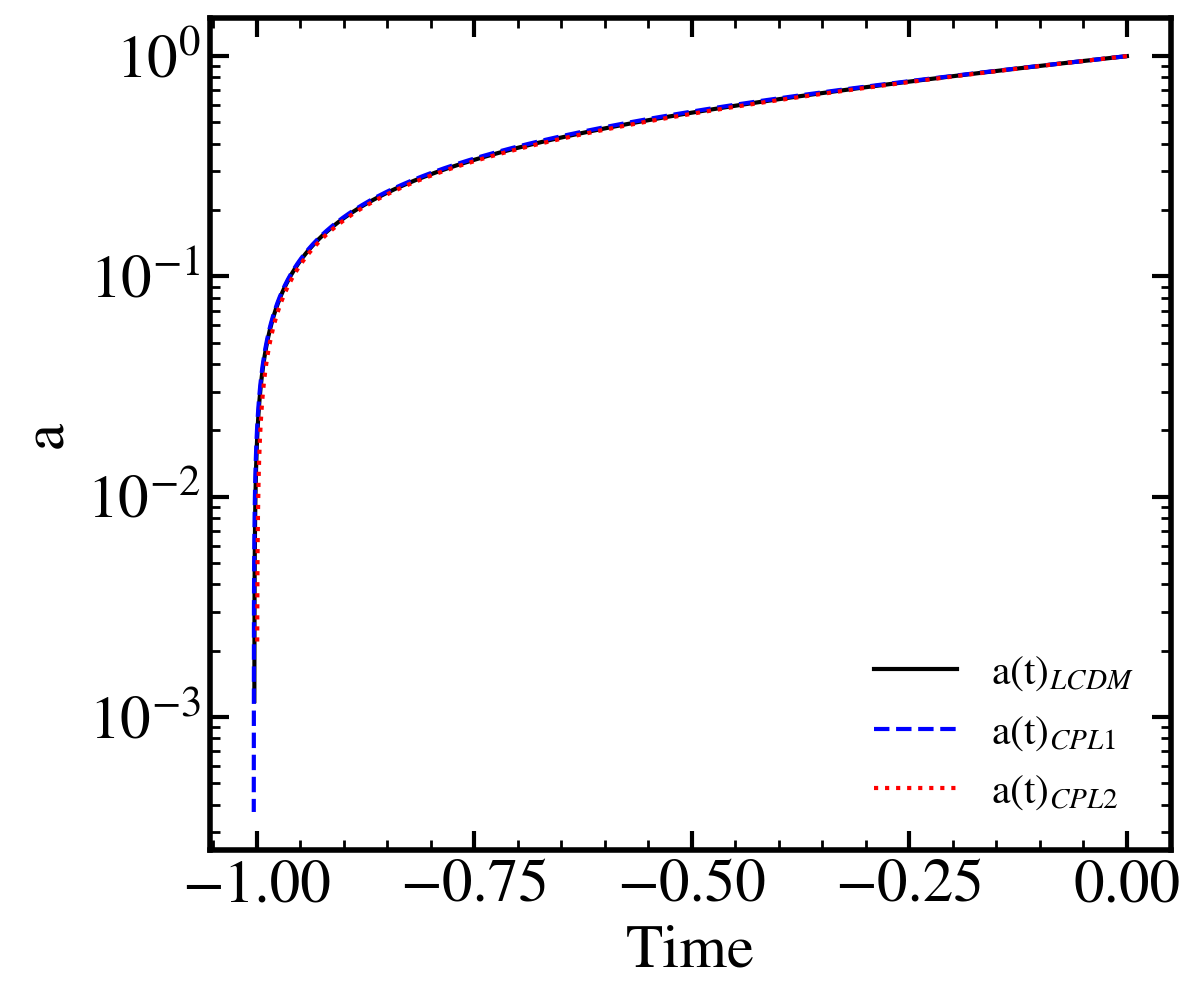

In [27]:
from scipy.integrate import odeint

Omega_m = 0.26
Omega_b = 0.044
Omega_k = 0.0
Omega_l = 1 - Omega_m

w0_1, wa_1 = -1, 0
w0_2, wa_2 = -1.2, 0.8
w0_3, wa_3 = -0.8, -0.8

a0   = 1
t0   = 0 # lookback time 
tau0 = 0 # lookback time
# code unit: [1/H0]

t   = np.linspace(t0, -1.1, 5000)
tau = np.linspace(tau0, -100, 5000)

at1   = odeint(dadt, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_1, wa_1))
at2   = odeint(dadt, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_2, wa_2))
at3   = odeint(dadt, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_3, wa_3))

atau1 = odeint(dadtau, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_1, wa_1))
atau2 = odeint(dadtau, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_2, wa_2))
atau3 = odeint(dadtau, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_3, wa_3))

fig, ax1 = plt.subplots(figsize=(6, 5))
plt.plot(t, at1, c='k', ls="-",  label=r'a(t)$_{LCDM}$')
plt.plot(t, at2, c='b', ls="--", label=r'a(t)$_{CPL1}$')
plt.plot(t, at3, c='r', ls=":",  label=r'a(t)$_{CPL2}$')

#plt.plot(tau, atau1, c='k', ls="-",  label=r'a($\tau$)$_{LCDM}$')
#plt.plot(tau, atau2, c='b', ls="--", label=r'a($\tau$)$_{CPL1}$')
#plt.plot(tau, atau3, c='r', ls=":",  label=r'a($\tau$)$_{CPL2}$')

#plt.axhline(1/201) # zstart = 200
# plt.axvline(-age1)
# plt.axvline(-age2)
# plt.axvline(-age3)

plt.xlabel("Time")
plt.ylabel("a")
plt.yscale('log')
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

The value of `at` is not calculated over `age` of the Universe.

In [28]:
at1[t < -age1]
# at2[t < -age2]
# at3[t < -age3]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
      

/tmp/ipykernel_2903361/1385294264.py:7: RuntimeWarning: invalid value encountered in sqrt
  dadt = np.sqrt(dadt2)
/tmp/ipykernel_2903361/1385294264.py:5: RuntimeWarning: invalid value encountered in power
  O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \


<IPython.core.display.Javascript object>


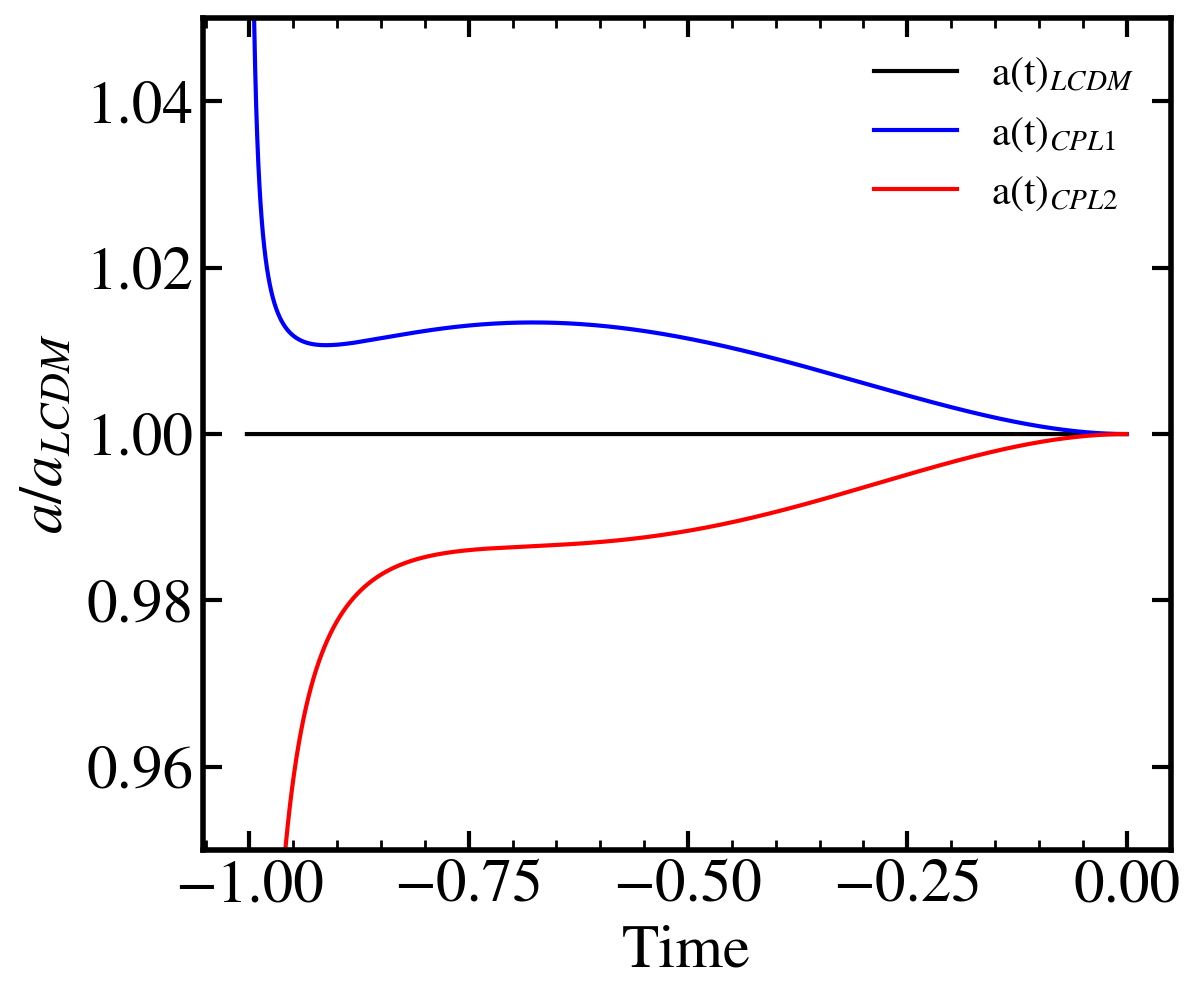

In [29]:
from scipy.integrate import odeint

Omega_m = 0.26
Omega_b = 0.044
Omega_k = 0.0
Omega_l = 1 - Omega_m

w0_1, wa_1 = -1, 0
w0_2, wa_2 = -1.2, 0.8
w0_3, wa_3 = -0.8, -0.8

a0   = 1
t0   = 0 # lookback time 
tau0 = 0 # lookback time
# code unit: [1/H0]

t   = np.linspace(t0, -1.1, 5000)
tau = np.linspace(tau0, -100, 5000)

at1   = odeint(dadt, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_1, wa_1))
at2   = odeint(dadt, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_2, wa_2))
at3   = odeint(dadt, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_3, wa_3))

atau1 = odeint(dadtau, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_1, wa_1))
atau2 = odeint(dadtau, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_2, wa_2))
atau3 = odeint(dadtau, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_3, wa_3))

fig, ax1 = plt.subplots(figsize=(6, 5))
plt.plot(t, at1/at1, c='k', label=r'a(t)$_{LCDM}$')
plt.plot(t, at2/at1, c='b', label=r'a(t)$_{CPL1}$')
plt.plot(t, at3/at1, c='r', label=r'a(t)$_{CPL2}$')

# plt.plot(tau, atau1, c='k', ls="-",  label=r'a($\tau$)$_{LCDM}$')
# plt.plot(tau, atau2, c='b', ls="--", label=r'a($\tau$)$_{CPL1}$')
# plt.plot(tau, atau3, c='r', ls=":",  label=r'a($\tau$)$_{CPL2}$')

# plt.axhline(1/201) # zstart = 200
# plt.axvline(-age1)
# plt.axvline(-age2)
# plt.axvline(-age3)

plt.xlabel("Time")
plt.ylabel(r"$a/a_{LCDM}$")
plt.ylim(0.95, 1.05)
#plt.yscale('log')
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

# Generating a lookup table for $t$, $\tau$, and $a$

In [30]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint

# input params
Omega_m = 0.26
Omega_l = 0.74
Omega_k = 0
w0 = -1
wa = 0
ntable = 10000


a0   = 1
t0   = 0 # lookback time 
tau0 = 0 # lookback time
# code unit: [1/H0]

t    = np.linspace(t0, -1.1, ntable)
tau  = np.linspace(tau0, -100, ntable)
at   = odeint(dadt, a0, t, args=(Omega_m, Omega_l, Omega_k, w0, wa)).flatten()
atau = odeint(dadtau, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0, wa)).flatten()

# Ensure monotonicity for interpolation
sorted_indices = np.argsort(atau)
atau_sort = atau[sorted_indices]
tau_sort = tau[sorted_indices]

sorted_indices = np.argsort(at)
at_sort = at[sorted_indices]
t_sort = t[sorted_indices]

# Interpolation
tau_interp = np.interp(at, atau_sort, tau_sort)
t_interp = np.interp(atau, at_sort, t_sort)

/tmp/ipykernel_2903361/1385294264.py:7: RuntimeWarning: invalid value encountered in sqrt
  dadt = np.sqrt(dadt2)


<IPython.core.display.Javascript object>


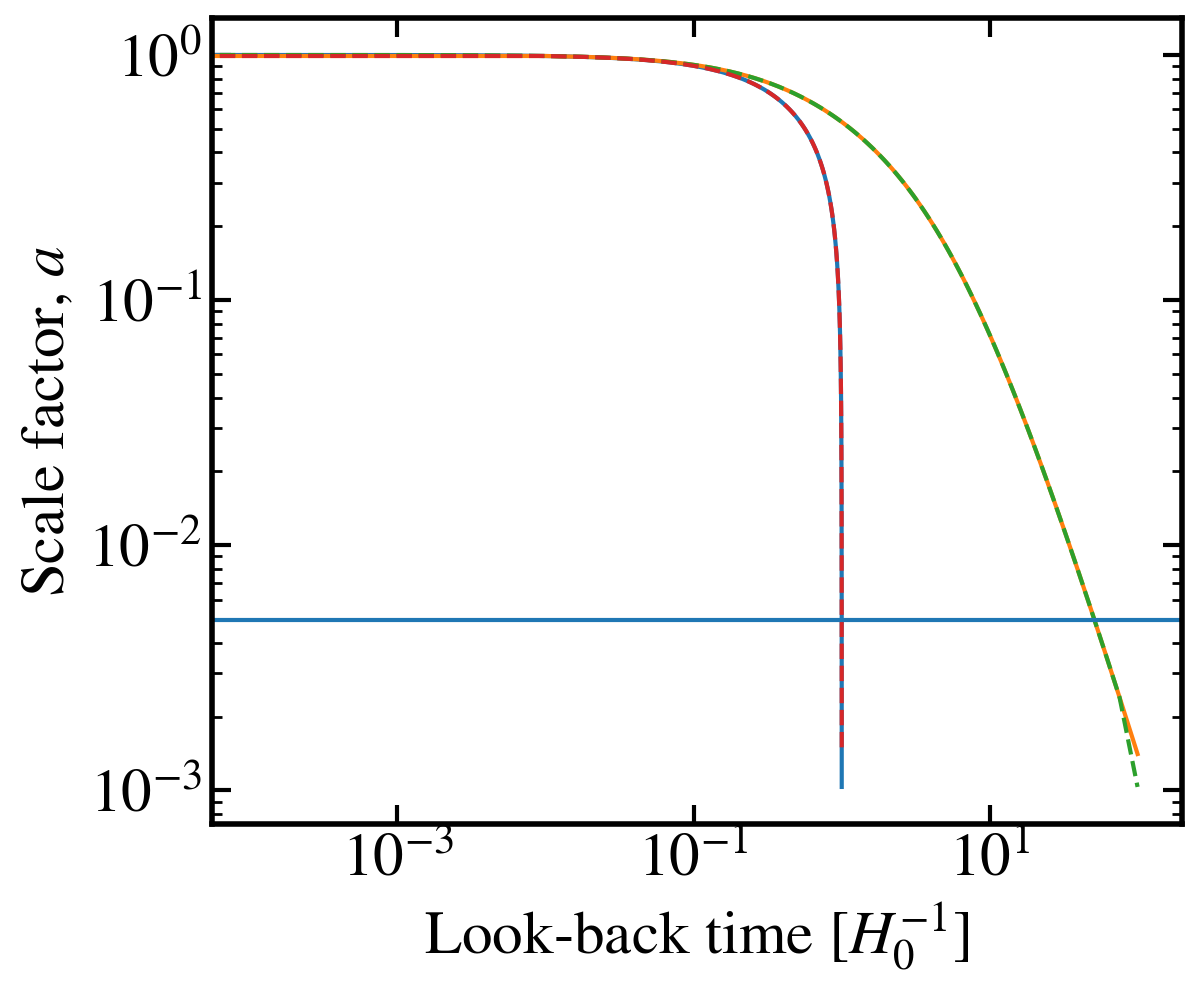

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [31]:
plt.figure(figsize=(6, 5))
plt.plot(-t, at)#, "o-", ms=2)
plt.plot(-tau, atau)#, "o-", ms=2)
plt.plot(-tau_interp, at, ls="--")
plt.plot(-t_interp, atau, ls="--")

plt.axhline(1/201)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Look-back time [$H_0^{-1}$]")
plt.ylabel("Scale factor, $a$")
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)

In [32]:
table_dic = {
    "t": t_interp,
    "tau": tau,
    "a": atau,
}

In [33]:
table = pd.DataFrame(table_dic)

In [34]:
table['t_Gyr'] = table['t']*unit_t

In [35]:
table

,t,tau,a,t_Gyr
0,0.000000,0.000000,1.000000,0.000000
1,-0.009902,-0.010001,0.990128,-0.134570
2,-0.019611,-0.020002,0.980505,-0.266516
3,-0.029134,-0.030003,0.971121,-0.395930
4,-0.038477,-0.040004,0.961965,-0.522897
...,...,...,...,...
9995,-1.002940,-99.959996,0.001408,-13.629910
9996,-1.002940,-99.969997,0.001408,-13.629911
9997,-1.002940,-99.979998,0.001407,-13.629911
9998,-1.002940,-99.989999,0.001407,-13.629911


In [36]:
# table.to_csv("./table.csv")

# -dadt

In [31]:
def dadt_(y, t, O_mat_0, O_vac_0, O_k_0, w0, wa):
    a = y
    dadt2 = (1/a) * \
            (O_mat_0 + \
             O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \
             O_k_0 * a)
    dadt = np.sqrt(dadt2)
    return -dadt

def dadtau_(y, t, O_mat_0, O_vac_0, O_k_0, w0, wa):
    a = y
    dadtau2 = a**3 * \
              (O_mat_0 + \
               O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \
               O_k_0 * a)
    dadtau = np.sqrt(dadtau2)
    return -dadtau

/tmp/ipykernel_417651/610334314.py:7: RuntimeWarning: invalid value encountered in sqrt
  dadt = np.sqrt(dadt2)
/tmp/ipykernel_417651/610334314.py:5: RuntimeWarning: invalid value encountered in power
  O_vac_0 * a**(-3 * (w0 + wa)) * np.exp(-3 * wa * (1 - a)) + \


<IPython.core.display.Javascript object>


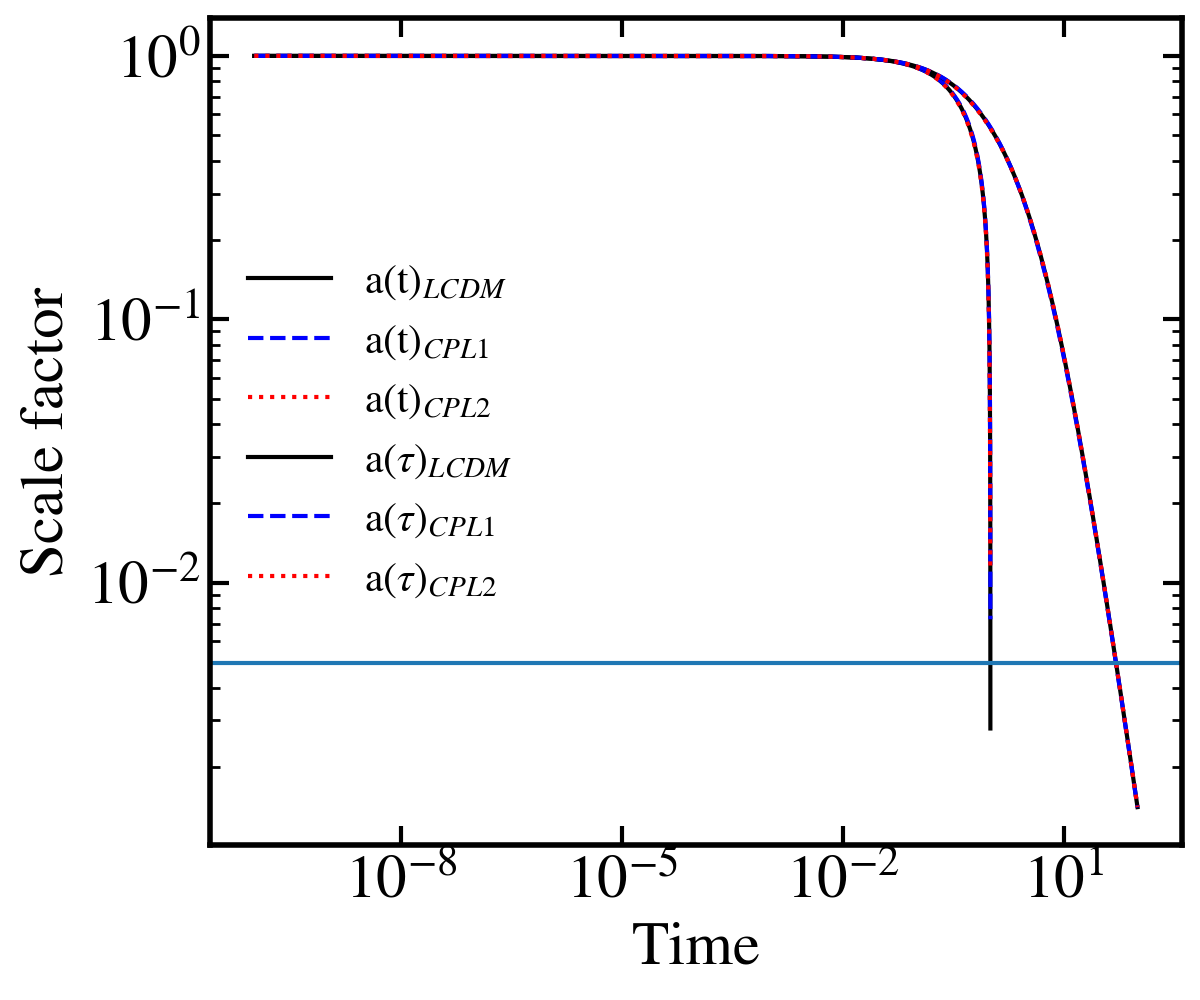

In [32]:
from scipy.integrate import odeint

Omega_m = 0.26
Omega_b = 0.044
Omega_k = 0.0
Omega_l = 1 - Omega_m

w0_1, wa_1 = -1, 0
w0_2, wa_2 = -1.2, 0.8
w0_3, wa_3 = -0.8, -0.8

a0   = 1
t0   = 0 # lookback time 
tau0 = 0 # lookback time
# code unit: [1/H0]

# t   = -np.linspace(t0, -1.1, 5000)
# tau = -np.linspace(tau0, -100, 5000)

t = np.logspace(-10, np.log10(1.1), 10000)
tau = np.logspace(-10, np.log10(100), 10000)

at1   = odeint(dadt_, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_1, wa_1))
at2   = odeint(dadt_, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_2, wa_2))
at3   = odeint(dadt_, a0, t, args=(Omega_m, Omega_l, Omega_k, w0_3, wa_3))

atau1 = odeint(dadtau_, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_1, wa_1))
atau2 = odeint(dadtau_, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_2, wa_2))
atau3 = odeint(dadtau_, a0, tau, args=(Omega_m, Omega_l, Omega_k, w0_3, wa_3))

fig, ax1 = plt.subplots(figsize=(6, 5))
plt.plot(t, at1, c='k', ls="-",  label=r'a(t)$_{LCDM}$')
plt.plot(t, at2, c='b', ls="--", label=r'a(t)$_{CPL1}$')
plt.plot(t, at3, c='r', ls=":",  label=r'a(t)$_{CPL2}$')

plt.plot(tau, atau1, c='k', ls="-",  label=r'a($\tau$)$_{LCDM}$')
plt.plot(tau, atau2, c='b', ls="--", label=r'a($\tau$)$_{CPL1}$')
plt.plot(tau, atau3, c='r', ls=":",  label=r'a($\tau$)$_{CPL2}$')

plt.axhline(1/201) # zstart = 200
# plt.axvline(age1)
# plt.axvline(age2)
# plt.axvline(age3)

plt.xlabel("Time")
plt.ylabel("Scale factor")
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=15, frameon=False)
plt.tight_layout(pad=0.3)